<a href="https://colab.research.google.com/github/ErikaNigrinis/Mapa_ComidaChina-app/blob/main/VizzuBuilder2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit
!pip install ipyvizzu
!pip install "ipyvizzu-story[jupyter]"

In [2]:
file_name = "/content/app.py"
code = """

# Definimos los parámetros de configuración de la aplicación
import streamlit as st
import pandas as pd
from ipyvizzu import Config, Data, Style # https://ipyvizzu.vizzuhq.com/latest/
from ipyvizzustory import Story, Slide, Step # https://vizzu-story.vizzuhq.com/latest/
import math
st.set_page_config(
    page_title="Paris 2024 Olympics - Animated data summary", #Título de la página
    page_icon="🏃‍➡️", # Ícono
    layout="wide", # Forma de layout ancho o compacto
    initial_sidebar_state="expanded" # Definimos si el sidebar aparece expandido o colapsado
)

estilos = '''
<style>
    h2,
    div[data-testid="stMetricValue"] {
        color: #735497;
    }
    body {
        background-color: #f8f8f9;
    }
</style>
'''

st.html(estilos)

# Se pueden cargar los datos al Vizzu Streamlit Builder
# se procede con la creación de los gráficos y se adicionan como historia, las cuales se pueden
# adicionar a un programa de Streamlit
# https://vizzu-builder.streamlit.app/

# Cargamos los tipos
d_types = {
    "medal_type": str,
    "medal_code": float,
    "name": str,
    "gender": str,
    "country": str,
    "country_code": str,
    "nationality": str,
    "team": str,
    "team_gender": str,
    "discipline": str,
    "event": str,
    "event_type": str,
    "url_event": str,
    "code": str,
}


# Información de los olímpicos
# Cargamos los datos descargados de https://www.kaggle.com/datasets/sajkazmi/paris-olympics-2024-games-dataset-updated-daily
df = pd.read_csv("https://raw.githubusercontent.com/gcastano/Streamlit-Demo-Apps/main/StreamlitVizzu/medallists.csv", parse_dates=['birth_date','medal_date'],dtype=d_types)

# Calculamos la edad de los medallistas
df["age"]=((df["medal_date"] - df["birth_date"]).dt.days/365.25).fillna(0)
df["age"]=df["age"].apply(math.floor).astype(str)
# Corregimos los datos del tipo de medalla
df["medal_type"]=df["medal_type"].str.replace(" Medal", "")

# Creamos el objeto Data de Vizzu
data = Data()
# Adicionamos los datos ordenados por edad
data.add_df(df.sort_values('age'))

# Creamos el objeto story con la Data cargada
story = Story(data)

# Definimos el ancho y alto del visor de Vizzu
story.set_size(1200, 600)
# Hanbilitamos el tooltip
story.set_feature("tooltip", True)


# Comenzamos a adicionar los slides de nuestra presentación
story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 0)"), # Quitamos las edades en cero que corresponden a competencias en equipos
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "age",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": None,
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per age",
                    "subtitle":"40 medallists under 18 years old and 5 over 50 years old",
                }
            ),
            Style(
                {
                    "fontFamily": 'Poppins',
                    "title": {"fontSize": 30,"color":'#735497FF',"fontWeight":"bold"},
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#735497",
                        },
                    }
                }
            ),

        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 0)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "age",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},
                        "title":"Medals"
                    },
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": True,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per age and type",
                    "subtitle":"40 medallists under 18 years old and 5 over 50 years old",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS","fontSize": 15}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#9a3602 #ffbc01 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "medal_type",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per type",
                    "subtitle":"A big total of 2,271 medals were distributed",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "fontSize": 20
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#9a3602 #ffbc01 #b8b8b8",
                        },
                    },
                    "Chart": {
                        "title": {}
                    }
                }
            ),
        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": {"set":"count()","title":"Medals"},
                    "y": {"set": "gender", "range": {"min": "auto", "max": "auto"}},
                    "color": "gender",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "vertical",
                    "label": "count()",
                    "title": "Medals per gender",
                    "subtitle": "Men won just a litte bit more medals than women",
                    "sort": "none",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "grouped",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#b8b8b8 #f4aacb #0096db #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": {"set": ["medal_type", "count()"],"title":"Medals"},#["medal_type", "count()"],
                    "y": {"set": "gender", "range": {"min": "auto", "max": "auto"}},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "vertical",
                    "label": "count()",
                    "title": "Medals per type and gender",
                    "subtitle": "The gender difference is distributed, bronze has the biggest difference",
                    "sort": "none",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#9a3602 #ffbc01 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "reverse":True,
                    "title": "Medals per country",
                    "subtitle": "United States was the big winner, followed by France, China and Great Britain",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708,
                                "fontSize": 10
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#eb0000 #fd7c4b #cc9577 #fda276 #d5895b #dc9376 #a46850 #fd723c #e97c5e #b3654e #b75121 #966443 #d15948 #fd6a4a #fe9f8a #bb5b58 #fb786c #fc5a54 #fd8047 #fe4e49 #ff8d69 #dab18f #e9908f #9e8171 #99746b",
                        },
                        "paddingBottom": 100
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['medal_type'] == 'Gold')"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "What country got more gold?",
                    "subtitle": "United States won more gold, followed by Netherlands, China and France",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#03ae71 #f4941b #f4c204 #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "discipline",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals per discipline",
                    "subtitle": "Athletics and Swimming distributed more medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#3394b6 #5ab4cb #4199b9 #599f9c #bf7caf #b6918b #8785a9 #76b4ce #8f8dba #6b789e #6b5c78 #757284 #8ea5be #8498aa #778393 #b897a4 #64ad9f #977675 #65dbd5",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] < 18) & (record['age'] > 0)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals for the younger",
                    "subtitle": "Where the athletes with less than 18 years old won medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#9a3602 #ffbc01 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 49)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals for the older",
                    "subtitle": "Where the athletes over 50 years old won medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#9a3602 #ffbc01 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "distinct(discipline)", "range": {"min": "auto", "max": "110%"},"title":"Disciplines"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "distinct(discipline)",
                    "sort": "byValue",
                    "title": "Disciplines each country won medals",
                    "subtitle": "United States won medals in 34 disciplines, France in 27 and China and Great Britain in 21",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#03ae71 #f4941b #f4c204 #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)

# Encabezado
st.header("Paris 2024 Olympics - Animated Summary")
medals = len(df)
countries = df['country'].nunique()
disciplines = df['discipline'].nunique()
ages = df[df['age'].astype(int)>0]['age'].nunique()
agesMin = df[df['age'].astype(int)>0]['age'].min()
agesMax = df[df['age'].astype(int)>0]['age'].max()
cols = st.columns([2,10,2])
with cols[0]:
    st.image("https://raw.githubusercontent.com/gcastano/Streamlit-Demo-Apps/main/StreamlitVizzu/Logo_Paris2024_OlyEmbleme.png")
    st.info("Created with base using [Streamlit](https://streamlit.io/), [Vizzu](https://www.vizzu.io/) and a dataset from [Kaggle](https://www.kaggle.com/datasets/sajkazmi/paris-olympics-2024-games-dataset-updated-daily)")
with cols[1]:
    st.subheader("Olympics")
    story.play()
    st.info("Click on the play button to see every slide...enjoy 😁")
with cols[2]:
    st.metric("Total Medals:",f"{medals:,.0f}")
    st.metric("Countries:",f"{countries:,.0f}")
    st.metric("Disciplines:",f"{disciplines:,.0f}")
    st.metric("Ages:",f"{ages:,.0f}")
    st.metric("Younger:",f"{agesMin} years old")
    st.metric("Older:",f"{agesMax} years old")



df = pd.read_csv("https://raw.githubusercontent.com/gcastano/Streamlit-Demo-Apps/main/StreamlitVizzu/paralympic_2024_medallists.csv", parse_dates=['birth_date','medal_date'],dtype=d_types)

# Calculamos la edad de los medallistas
df["age"]=((df["medal_date"] - df["birth_date"]).dt.days/365.25).fillna(0)
df["age"]=df["age"].apply(math.floor).astype(str)
# Corregimos los datos del tipo de medalla
df["medal_type"]=df["medal_type"].str.replace(" Medal", "")

youngMedallists = len(df[df["age"].astype(int)<18])
oldMedallists = len(df[df["age"].astype(int)>50])
medals = len(df)
countries = df['country'].nunique()
disciplines = df['discipline'].nunique()
ages = df[df['age'].astype(int)>0]['age'].nunique()
agesMin = df[df['age'].astype(int)>0]['age'].min()
agesMax = df[df['age'].astype(int)>0]['age'].max()

# Creamos el objeto Data de Vizzu
data = Data()
# Adicionamos los datos ordenados por edad
data.add_df(df.sort_values('age'))

# Creamos el objeto story con la Data cargada
story = Story(data)

# Definimos el ancho y alto del visor de Vizzu
story.set_size(1200, 600)
# Hanbilitamos el tooltip
story.set_feature("tooltip", True)


# Comenzamos a adicionar los slides de nuestra presentación
story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 0)"), # Quitamos las edades en cero que corresponden a competencias en equipos
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "age",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": None,
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per age",
                    "subtitle":f"{youngMedallists} medallists under 18 years old and {oldMedallists} over 50 years old",
                }
            ),
            Style(
                {
                    "fontFamily": 'Poppins',
                    "title": {"fontSize": 30,"color":'#735497FF',"fontWeight":"bold"},
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#735497",
                        },
                    }
                }
            ),

        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 0)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "age",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},
                        "title":"Medals"
                    },
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": True,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per age and type",
                    "subtitle":f"{youngMedallists} medallists under 18 years old and {oldMedallists} over 50 years old",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS","fontSize": 15}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#ffbc01 #9a3602 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "medal_type",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "title": "Medals per type",
                    "subtitle":f"A big total of {medals:,.0f} medals were distributed",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "fontSize": 20
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#ffbc01 #9a3602 #b8b8b8",
                        },
                    },
                    "Chart": {
                        "title": {}
                    }
                }
            ),
        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": {"set":"count()","title":"Medals"},
                    "y": {"set": "gender", "range": {"min": "auto", "max": "auto"}},
                    "color": "gender",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "vertical",
                    "label": "count()",
                    "title": "Medals per gender",
                    "subtitle": "Men won more medals than women",
                    "sort": "none",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "grouped",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#b8b8b8 #f4aacb #0096db #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": {"set": ["medal_type", "count()"],"title":"Medals"},#["medal_type", "count()"],
                    "y": {"set": "gender", "range": {"min": "auto", "max": "auto"}},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "vertical",
                    "label": "count()",
                    "title": "Medals per type and gender",
                    "subtitle": "The gender difference is distributed, silver has the biggest difference",
                    "sort": "none",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#ffbc01 #9a3602 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "reverse":True,
                    "title": "Medals per country",
                    "subtitle": "China was the big winner, followed by United States and Great Britain",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708,
                                "fontSize": 10
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#eb0000 #fd7c4b #cc9577 #fda276 #d5895b #dc9376 #a46850 #fd723c #e97c5e #b3654e #b75121 #966443 #d15948 #fd6a4a #fe9f8a #bb5b58 #fb786c #fc5a54 #fd8047 #fe4e49 #ff8d69 #dab18f #e9908f #9e8171 #99746b",
                        },
                        "paddingBottom": 100
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['medal_type'] == 'Gold')"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "What country got more gold?",
                    "subtitle": "China won more gold, followed by Great Britain and United States",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#03ae71 #f4941b #f4c204 #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)


story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {"set": "count()", "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "discipline",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals per discipline",
                    "subtitle": "Athletics and Swimming distributed more medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                                "angle":1.5708
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#3394b6 #5ab4cb #4199b9 #599f9c #bf7caf #b6918b #8785a9 #76b4ce #8f8dba #6b789e #6b5c78 #757284 #8ea5be #8498aa #778393 #b897a4 #64ad9f #977675 #65dbd5",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] < 18) & (record['age'] > 0)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals for the younger",
                    "subtitle": "Where the athletes with less than 18 years old won medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS","angle":1.5708}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#ffbc01 #9a3602 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter("(record['age'] > 49)"),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "discipline",
                    "y": {
                        "set": ["medal_type", "count()"],
                        "range": {"min": "auto", "max": "110%"},"title":"Medals"},
                    "color": "medal_type",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "count()",
                    "sort": "byValue",
                    "title": "Medals for the older",
                    "subtitle": "Where the athletes over 50 years old won medals",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#ffbc01 #9a3602 #b8b8b8",
                        },
                    }
                }
            ),
        )
    )
)

story.add_slide(
    Slide(
        Step(
            Data.filter(None),
            Config(
                {
                    "coordSystem": "cartesian",
                    "geometry": "rectangle",
                    "x": "country",
                    "y": {"set": "distinct(discipline)", "range": {"min": "auto", "max": "110%"},"title":"Disciplines"},
                    "color": "country",
                    "lightness": None,
                    "size": None,
                    "noop": None,
                    "split": False,
                    "align": "none",
                    "orientation": "horizontal",
                    "label": "distinct(discipline)",
                    "sort": "byValue",
                    "title": "Disciplines each country won medals",
                    "subtitle": "China and Great Britain won medals in 19 disciplines, United States in 17 and France in 16",
                }
            ),
            Style(
                {
                    "plot": {
                        "yAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "xAxis": {"label": {"numberScale": "shortScaleSymbolUS"}},
                        "marker": {
                            "label": {
                                "numberFormat": "prefixed",
                                "maxFractionDigits": "1",
                                "numberScale": "shortScaleSymbolUS",
                            },
                            "rectangleSpacing": None,
                            "circleMinRadius": 0.005,
                            "borderOpacity": 1,
                            "colorPalette": "#03ae71 #f4941b #f4c204 #d49664 #f25456 #9e67ab #bca604 #846e1c #fc763c #b462ac #f492fc #bc4a94 #9c7ef4 #9c52b4 #6ca2fc #5c6ebc #7c868c #ac968c #4c7450 #ac7a4c #7cae54 #4c7450 #9c1a6c #ac3e94 #b41204",
                        },
                    }
                }
            ),
        )
    )
)

# Encabezado
cols = st.columns([2,10,2])
with cols[0]:
    st.image("https://raw.githubusercontent.com/gcastano/Streamlit-Demo-Apps/main/StreamlitVizzu/Paris2024_Paralympics_Emblem.jpg")
    st.info("Created with base using [Streamlit](https://streamlit.io/), [Vizzu](https://www.vizzu.io/) and a dataset from [Kaggle](https://www.kaggle.com/datasets/sajkazmi/paris-olympics-2024-games-dataset-updated-daily)")
with cols[1]:
    st.subheader("Paralympics")
    story.play()
    st.info("Click on the play button to see every slide...enjoy 😁")
with cols[2]:
    st.metric("Total Medals:",f"{medals:,.0f}")
    st.metric("Countries:",f"{countries:,.0f}")
    st.metric("Disciplines:",f"{disciplines:,.0f}")
    st.metric("Ages:",f"{ages:,.0f}")
    st.metric("Younger:",f"{agesMin} years old")
    st.metric("Older:",f"{agesMax} years old")

"""

In [3]:
with open(file_name, "w") as f:
    f.write(code)

print(f"Archivo '{file_name}' creado con éxito")

Archivo '/content/app.py' creado con éxito


In [4]:
#verificar que guardo la app
!ls

app.py			       medallists_with_age.csv		 sample_data
Logo_Paris2024_OlyEmbleme.png  paralympic_2024_medallists.csv
medallists.csv		       Paris2024_Paralympics_Emblem.jpg


In [5]:
!pip install pyngrok

In [6]:
from pyngrok import ngrok

# Coloca tu token aquí
ngrok.set_auth_token("2oXzyW3FkopvvKdpquqRlvObpGg_sQEc92mpHXXeJPKe8rSi")
# Crear un túnel para el puerto 8501
public_url = ngrok.connect(8501)

# Imprimir la URL pública
print("Tu aplicación está disponible en:", public_url)

Tu aplicación está disponible en: NgrokTunnel: "https://af5f-34-83-195-180.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Iniciar Streamlit (reemplaza 'app.py' con el nombre de tu archivo) DEBE ESTAR EJECUTANDOSE PARA LA CONEXION
!streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.195.180:8501



# SALIDA EN URL WEB

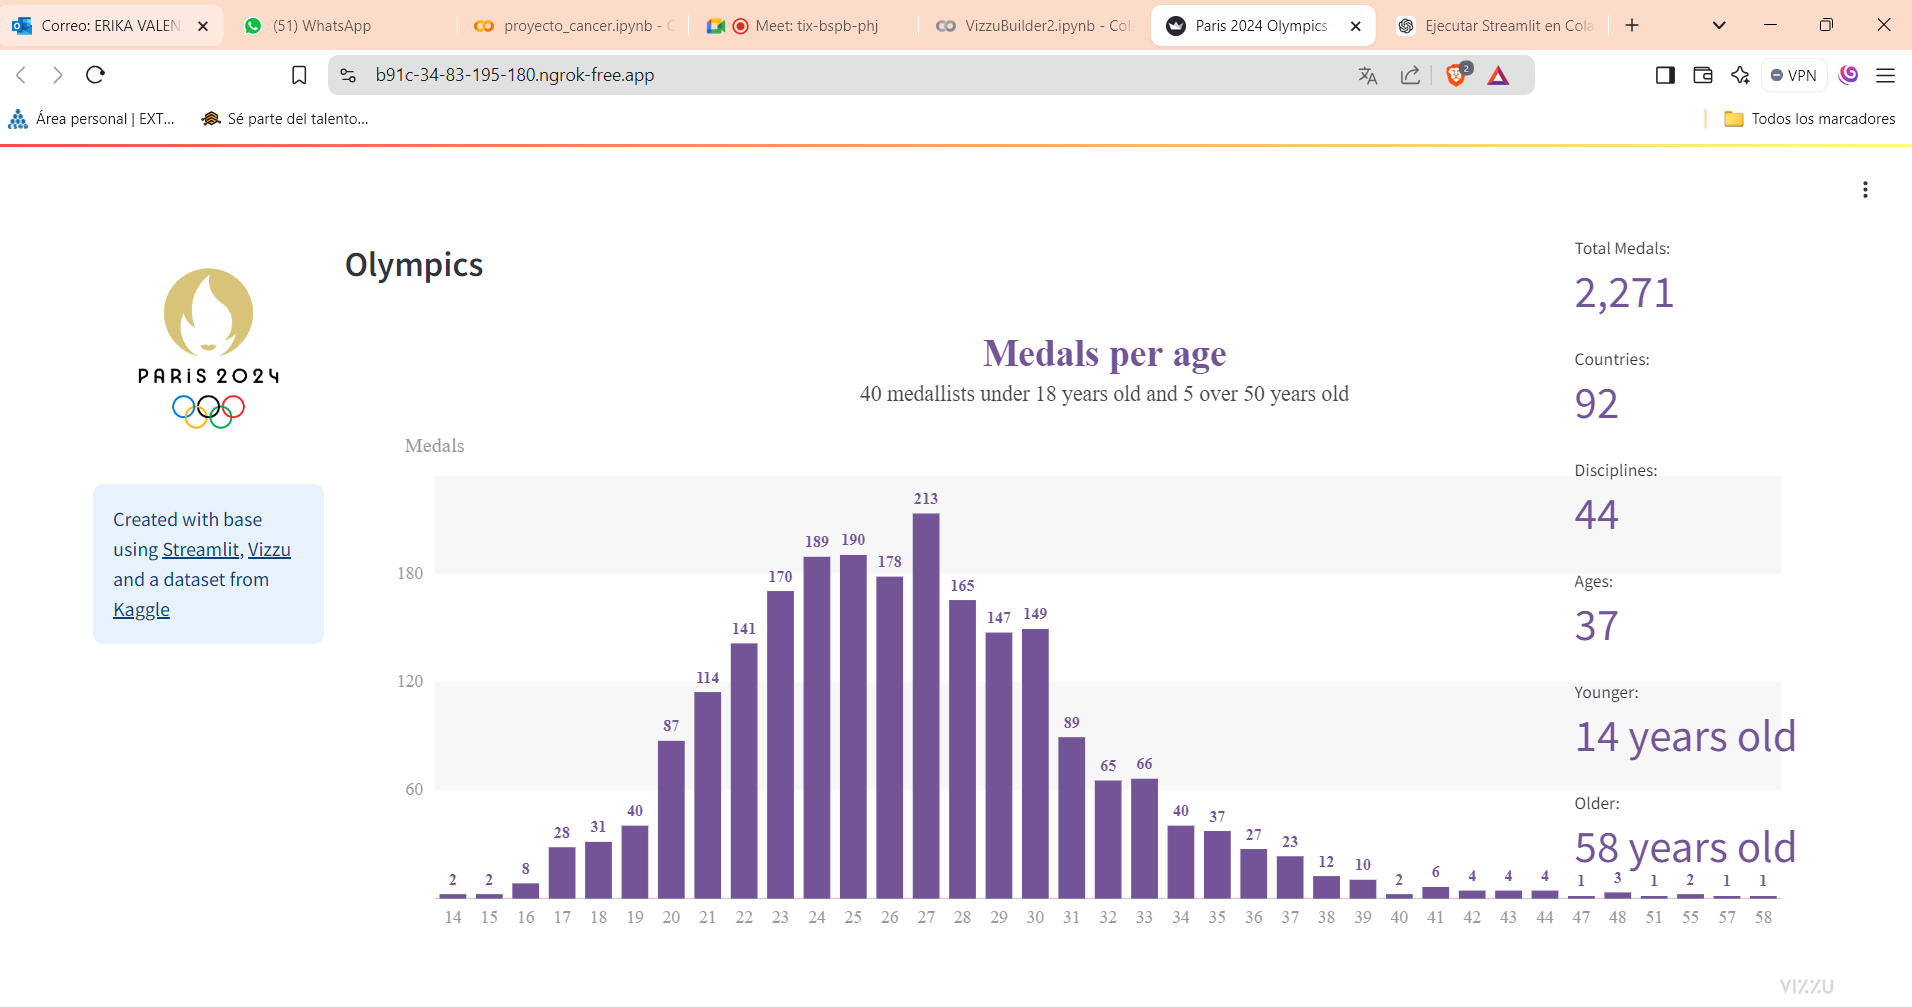